# Рекомендательная система. Отчёт

## Постановка задачи

**На вход:** История пользовательских покупок, информация о пользователе, информация о продуктах

**На выход:** Рекомендация того, что человек купит в следующий раз

Реализовать несколько методов рекомендательной системы продуктов
* baseline - global top
* ALS
* item-to-item
* user-to-user



Метрика - MAP30

## Данные

### Products


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>product_id</th>
      <th>level_1</th>
      <th>level_2</th>
      <th>level_3</th>
      <th>level_4</th>
      <th>segment_id</th>
      <th>brand_id</th>
      <th>vendor_id</th>
      <th>netto</th>
      <th>is_own_trademark</th>
      <th>is_alcohol</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0003020d3c</td>
      <td>c3d3a8e8c6</td>
      <td>c2a3ea8d5e</td>
      <td>b7cda0ec0c</td>
      <td>6376f2a852</td>
      <td>123.0</td>
      <td>394a54a7c1</td>
      <td>9eaff48661</td>
      <td>0.400</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0003870676</td>
      <td>e344ab2e71</td>
      <td>52f13dac0c</td>
      <td>d3cfe81323</td>
      <td>6dc544533f</td>
      <td>105.0</td>
      <td>acd3dd483f</td>
      <td>10486c3cf0</td>
      <td>0.680</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0003ceaf69</td>
      <td>c3d3a8e8c6</td>
      <td>f2333c90fb</td>
      <td>419bc5b424</td>
      <td>f6148afbc0</td>
      <td>271.0</td>
      <td>f597581079</td>
      <td>764e660dda</td>
      <td>0.500</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000701e093</td>
      <td>ec62ce61e3</td>
      <td>4202626fcb</td>
      <td>88a515c084</td>
      <td>48cf3d488f</td>
      <td>172.0</td>
      <td>54a90fe769</td>
      <td>03c2d70bad</td>
      <td>0.112</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0007149564</td>
      <td>e344ab2e71</td>
      <td>52f13dac0c</td>
      <td>d3cfe81323</td>
      <td>6dc544533f</td>
      <td>105.0</td>
      <td>63417fe1f3</td>
      <td>f329130198</td>
      <td>0.600</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>




```python
len(product_df)
```




    43038

    

### Clients


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>client_id</th>
      <th>first_issue_date</th>
      <th>first_redeem_date</th>
      <th>age</th>
      <th>gender</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>000012768d</td>
      <td>2017-08-05 15:40:48</td>
      <td>2018-01-04 19:30:07</td>
      <td>45</td>
      <td>U</td>
    </tr>
    <tr>
      <th>1</th>
      <td>000036f903</td>
      <td>2017-04-10 13:54:23</td>
      <td>2017-04-23 12:37:56</td>
      <td>72</td>
      <td>F</td>
    </tr>
    <tr>
      <th>2</th>
      <td>000048b7a6</td>
      <td>2018-12-15 13:33:11</td>
      <td>NaN</td>
      <td>68</td>
      <td>F</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000073194a</td>
      <td>2017-05-23 12:56:14</td>
      <td>2017-11-24 11:18:01</td>
      <td>60</td>
      <td>F</td>
    </tr>
    <tr>
      <th>4</th>
      <td>00007c7133</td>
      <td>2017-05-22 16:17:08</td>
      <td>2018-12-31 17:17:33</td>
      <td>67</td>
      <td>U</td>
    </tr>
  </tbody>
</table>
</div>



```python
len(client_df)
```




    400162

### Purchases



<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>client_id</th>
      <th>transaction_id</th>
      <th>transaction_datetime</th>
      <th>regular_points_received</th>
      <th>express_points_received</th>
      <th>regular_points_spent</th>
      <th>express_points_spent</th>
      <th>purchase_sum</th>
      <th>store_id</th>
      <th>product_id</th>
      <th>product_quantity</th>
      <th>trn_sum_from_iss</th>
      <th>trn_sum_from_red</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>9a80204f78</td>
      <td>2.0</td>
      <td>80.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>1</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>da89ebd374</td>
      <td>1.0</td>
      <td>65.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>0a95e1151d</td>
      <td>1.0</td>
      <td>24.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>4055b15e4a</td>
      <td>2.0</td>
      <td>50.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>4</th>
      <td>000012768d</td>
      <td>7e3e2e3984</td>
      <td>2018-12-01 07:12:45</td>
      <td>10.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>1007.0</td>
      <td>54a4a11a29</td>
      <td>a685f1916b</td>
      <td>1.0</td>
      <td>22.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>95</th>
      <td>000036f903</td>
      <td>0a3d640bf4</td>
      <td>2018-12-21 11:08:58</td>
      <td>7.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>700.0</td>
      <td>3c6c3b17f2</td>
      <td>ac81544ebc</td>
      <td>1.0</td>
      <td>20.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>96</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>746d395a83</td>
      <td>1.0</td>
      <td>58.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>97</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>3e038662c0</td>
      <td>1.0</td>
      <td>45.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>98</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>f5e18af323</td>
      <td>1.0</td>
      <td>67.0</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>99</th>
      <td>000036f903</td>
      <td>5b3e8ddbdd</td>
      <td>2018-12-23 09:59:01</td>
      <td>1.4</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>0.0</td>
      <td>290.0</td>
      <td>6381a55c22</td>
      <td>0f0c1288d3</td>
      <td>1.0</td>
      <td>120.0</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>
<p>100 rows × 13 columns</p>
</div>

## Обработка данных 

### Json

Важно, что в файле с покупками данные об одном пользовате идут подряд. Используя этот факт, соберём всю информацию о покупках конкретного человека в один json вида:

dict_keys(['age', 'gender', 'client_id', 'transaction_history', 'target'])

    {
      "age": 60,
      "gender": "F",
      "client_id": "000073194a",
      "transaction_history": [
        {
          "tid": "6e3215aca5",
          "datetime": "2018-11-25 10:56:20",
          "products": [
            {
              "product_id": "212f305c8b",
              "quantity": 2.0,
              "s": 447.0,
              "r": "0"
            },
            {
              "product_id": "2224fd78f2",
              "quantity": 2.0,
              "s": 33.0,
              "r": "0"
            }
          ],
          "rpr": 0.3,
          "epr": 0.0,
          "rps": 0.0,
          "eps": 0.0,
          "sum": 479.0,
          "store_id": "9e8fcd116d"
        },
        {
          "tid": "1d82d2ee6b",
          "datetime": "2018-12-08 10:07:33",
          "products": [
            {
              "product_id": "d6377ed635",
              "quantity": 1.0,
              "s": 29.0,
              "r": "0"
            },
            {
              "product_id": "4009f09b04",
              "quantity": 1.0,
              "s": 5.0,
              "r": "0"
            },
            {
              "product_id": "113e3ace79",
              "quantity": 7.0,
              "s": 180.0,
              "r": "0"
            }
          ],
          "rpr": 1.0,
          "epr": 0.0,
          "rps": 0.0,
          "eps": 0.0,
          "sum": 214.1,
          "store_id": "9e8fcd116d"
        },
      ],
      "target": [
        {
          "tid": "e93494ad1f",
          "datetime": "2019-03-16 09:41:21",
          "product_ids": [
            "6fbcfd9373",
            "0a4cfd2c86",
            "5a541d7e46"
          ],
          "store_id": "9e8fcd116d"
        }
      ]
    }
    

где сначала указана информация о самом пользователе, потом история его покупок со служебной информацией, а затем **целевая переменная**: то, что пользователь купит в следующий раз

Кроме того, данные пошардированы - исходный файл (5Gb Размером) разбит на несколько json, чтобы данные можно было использовать "кусочками"

### Train valid data

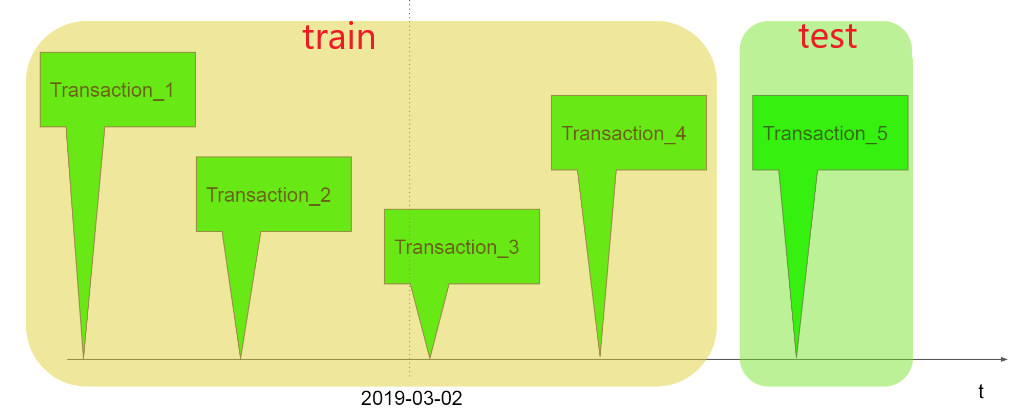